<a href="https://colab.research.google.com/github/bhattarai-aavash/deep_learning/blob/main/Notebooks/Chap03/3_4_Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.4 -- Activation functions**

The purpose of this practical is to experiment with different activation functions. <br>

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [25]:


def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3, 3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)

    ax[0,0].plot(x, pre_1, 'r-'); ax[0,0].set_ylabel('Preactivation', fontsize=12)
    ax[0,1].plot(x, pre_2, 'b-'); ax[0,1].set_ylabel('Preactivation', fontsize=12)
    ax[0,2].plot(x, pre_3, 'g-'); ax[0,2].set_ylabel('Preactivation', fontsize=12)

    ax[1,0].plot(x, act_1, 'r-'); ax[1,0].set_ylabel('Activation', fontsize=12)
    ax[1,1].plot(x, act_2, 'b-'); ax[1,1].set_ylabel('Activation', fontsize=12)
    ax[1,2].plot(x, act_3, 'g-'); ax[1,2].set_ylabel('Activation', fontsize=12)

    ax[2,0].plot(x, w_act_1, 'r-'); ax[2,0].set_ylabel('Weighted Act', fontsize=12)
    ax[2,1].plot(x, w_act_2, 'b-'); ax[2,1].set_ylabel('Weighted Act', fontsize=12)
    ax[2,2].plot(x, w_act_3, 'g-'); ax[2,2].set_ylabel('Weighted Act', fontsize=12)

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y, plot_x].set_xlim([-0.1, 2])  # Increase range for x-axis
        ax[plot_y, plot_x].set_ylim([-2, 1.5])  # Increase range for y-axis
        ax[plot_y, plot_x].set_aspect(0.5)
      ax[2, plot_y].set_xlabel('Input, $x$', fontsize=12)

    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x, y)
  ax.set_xlabel('Input, $x$', fontsize=14)
  ax.set_ylabel('Output, $y$', fontsize=14)
  ax.set_xlim([-0.1, 1.1])  # Increase range for x-axis
  ax.set_ylim([-2, 1.5])  # Increase range for y-axis
  ax.set_aspect(0.5)

  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i])

  plt.show()


In [38]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x

  print(f'\npre_1\n')
  print(pre_1)
  print(f'\npre_2\n')
  print(pre_2)
  print(f'\npre_3\n')
  print(pre_3)
  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)

  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3

  y = phi_0 + w_act_1 + w_act_2 + w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [5]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

First, let's run the network with a ReLU functions

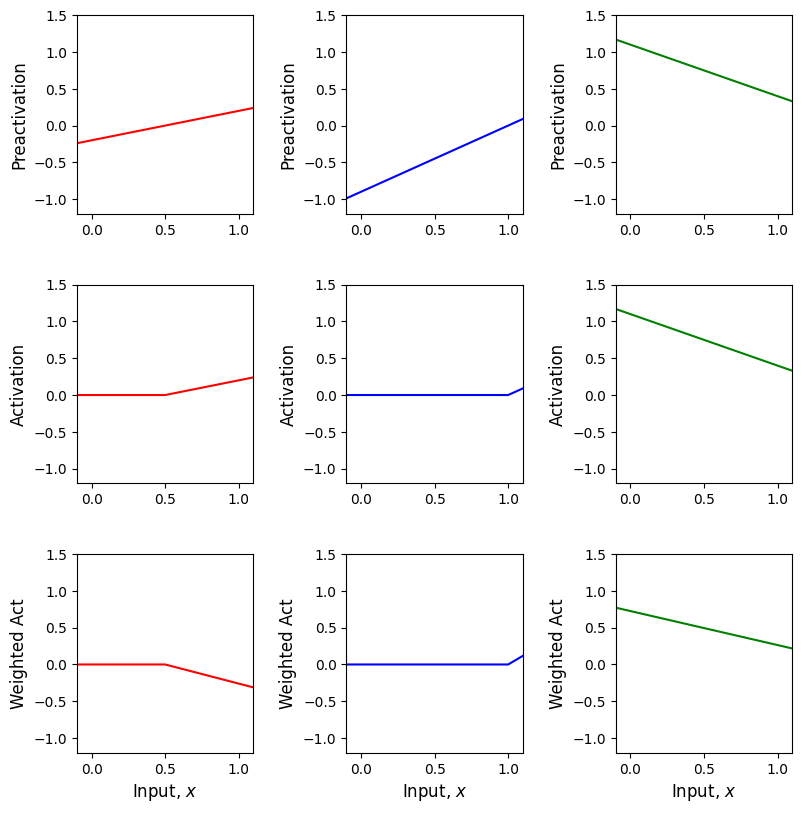

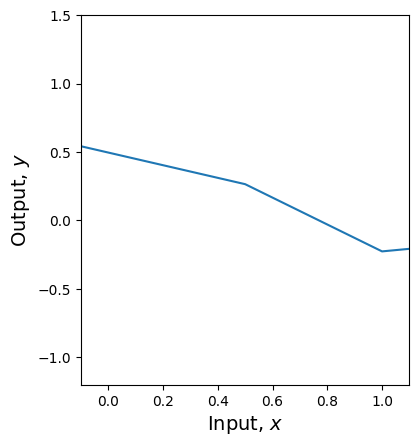

In [ ]:
# Now lets define some parameters and run the neural network
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(-1,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, ReLU, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

# Sigmoid activation function

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f[z] = \frac{1}{1+\exp{[-10 z ]}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [9]:
# Define the sigmoid function
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the
  # hidden unit from the preactivation.  Use the np.exp() function.
  activation = 1/(1+np.exp(-10*preactivation))


  return activation

In [6]:
def tanh(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the
  # hidden unit from the preactivation.  Use the np.exp() function.
  activation = np.tanh(10*preactivation)


  return activation

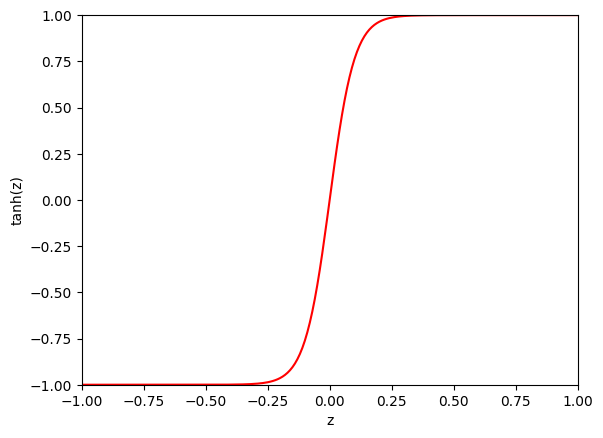

In [7]:
# Make an array of inputs
z = np.arange(-10, 10, 0.01)
tanh_z = tanh(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z, tanh_z, 'r-')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('z')
ax.set_ylabel('tanh(z)')
plt.show()

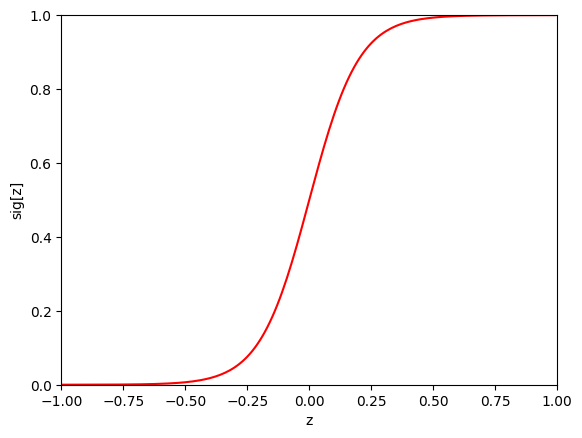

In [10]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig[z]')
plt.show()

Let's see what happens when we use this activation function in a neural network


pre_1

[-6.00000000e-01 -5.96000000e-01 -5.92000000e-01 -5.88000000e-01
 -5.84000000e-01 -5.80000000e-01 -5.76000000e-01 -5.72000000e-01
 -5.68000000e-01 -5.64000000e-01 -5.60000000e-01 -5.56000000e-01
 -5.52000000e-01 -5.48000000e-01 -5.44000000e-01 -5.40000000e-01
 -5.36000000e-01 -5.32000000e-01 -5.28000000e-01 -5.24000000e-01
 -5.20000000e-01 -5.16000000e-01 -5.12000000e-01 -5.08000000e-01
 -5.04000000e-01 -5.00000000e-01 -4.96000000e-01 -4.92000000e-01
 -4.88000000e-01 -4.84000000e-01 -4.80000000e-01 -4.76000000e-01
 -4.72000000e-01 -4.68000000e-01 -4.64000000e-01 -4.60000000e-01
 -4.56000000e-01 -4.52000000e-01 -4.48000000e-01 -4.44000000e-01
 -4.40000000e-01 -4.36000000e-01 -4.32000000e-01 -4.28000000e-01
 -4.24000000e-01 -4.20000000e-01 -4.16000000e-01 -4.12000000e-01
 -4.08000000e-01 -4.04000000e-01 -4.00000000e-01 -3.96000000e-01
 -3.92000000e-01 -3.88000000e-01 -3.84000000e-01 -3.80000000e-01
 -3.76000000e-01 -3.72000000e-01 -3.68000000e-01 -3.64000000e-01
 -3.60000000e-01 

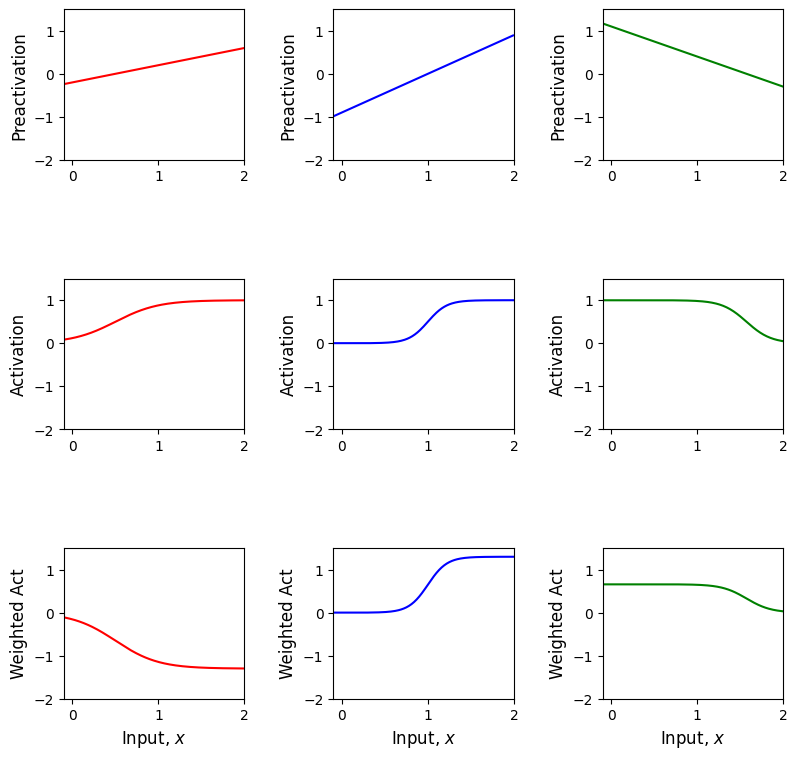

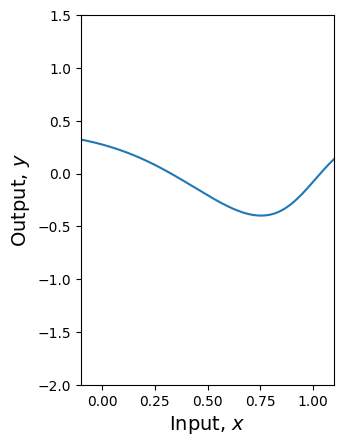

In [43]:
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)


pre_1

[-6.00000000e-01 -5.96000000e-01 -5.92000000e-01 -5.88000000e-01
 -5.84000000e-01 -5.80000000e-01 -5.76000000e-01 -5.72000000e-01
 -5.68000000e-01 -5.64000000e-01 -5.60000000e-01 -5.56000000e-01
 -5.52000000e-01 -5.48000000e-01 -5.44000000e-01 -5.40000000e-01
 -5.36000000e-01 -5.32000000e-01 -5.28000000e-01 -5.24000000e-01
 -5.20000000e-01 -5.16000000e-01 -5.12000000e-01 -5.08000000e-01
 -5.04000000e-01 -5.00000000e-01 -4.96000000e-01 -4.92000000e-01
 -4.88000000e-01 -4.84000000e-01 -4.80000000e-01 -4.76000000e-01
 -4.72000000e-01 -4.68000000e-01 -4.64000000e-01 -4.60000000e-01
 -4.56000000e-01 -4.52000000e-01 -4.48000000e-01 -4.44000000e-01
 -4.40000000e-01 -4.36000000e-01 -4.32000000e-01 -4.28000000e-01
 -4.24000000e-01 -4.20000000e-01 -4.16000000e-01 -4.12000000e-01
 -4.08000000e-01 -4.04000000e-01 -4.00000000e-01 -3.96000000e-01
 -3.92000000e-01 -3.88000000e-01 -3.84000000e-01 -3.80000000e-01
 -3.76000000e-01 -3.72000000e-01 -3.68000000e-01 -3.64000000e-01
 -3.60000000e-01 

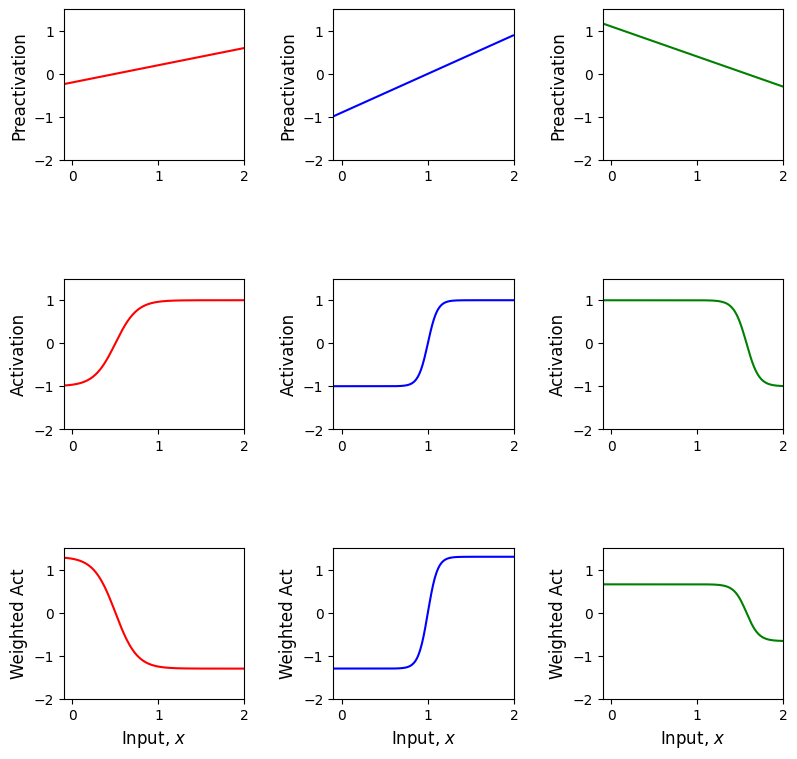

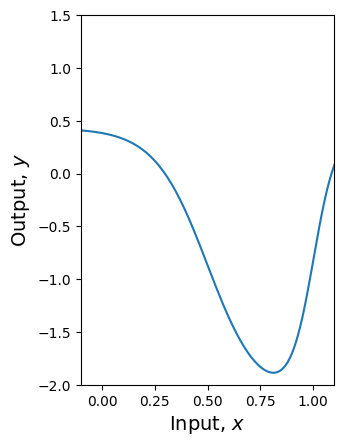

In [46]:
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66

# Define a range of input values
x = np.arange(-1,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, tanh, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

# Heaviside activation function

The Heaviside function is defined as:

\begin{equation}
\text{heaviside}[z] = \begin{cases} 0 & \quad z <0 \\ 1 & \quad z\geq 0\end{cases}
\end{equation}

In [13]:
# Define the heaviside function
def heaviside(preactivation):
  # TODO write code to implement the heaviside function and compute the activation at the
  # hidden unit from the preactivation.  Depending on your implementation you may need to
  # convert a Boolean array to an array of ones and zeros.  To do this, use .astype(int)
  activation = np.heaviside(preactivation,1)


  return activation

In [34]:

def rectangular(preactivation):
  # TODO write code to implement the heaviside function and compute the activation at the
  # hidden unit from the preactivation.  Depending on your implementation you may need to
  # convert a Boolean array to an array of ones and zeros.  To do this, use .astype(int)
  activation = np.where((preactivation >= 0) & (preactivation <= 1), 1, 0)

  print(activation)

  return activation

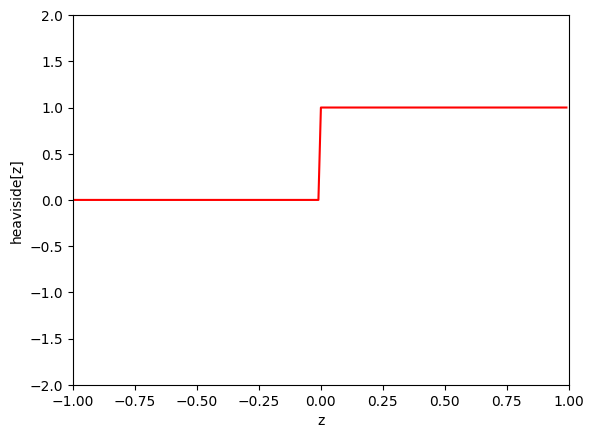

In [15]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
heav_z = heaviside(z)

# Plot the heaviside function
fig, ax = plt.subplots()
ax.plot(z,heav_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([-2,2])
ax.set_xlabel('z'); ax.set_ylabel('heaviside[z]')
plt.show()

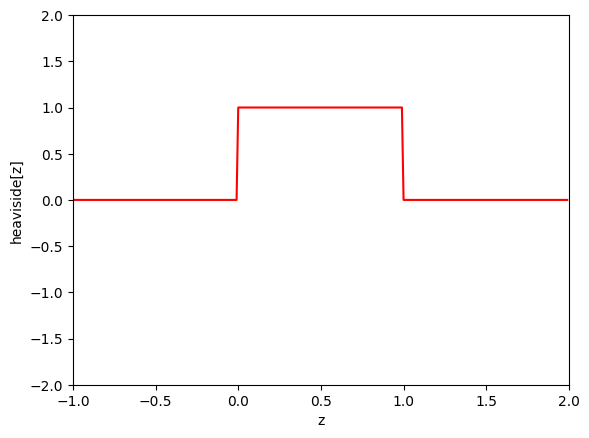

In [29]:
# Make an array of inputs
z = np.arange(-1,2,0.01)
heav_z = rectangular(z)

# Plot the heaviside function
fig, ax = plt.subplots()
ax.plot(z,heav_z,'r-')
ax.set_xlim([-1,2]);ax.set_ylim([-2,2])
ax.set_xlabel('z'); ax.set_ylabel('heaviside[z]')
plt.show()

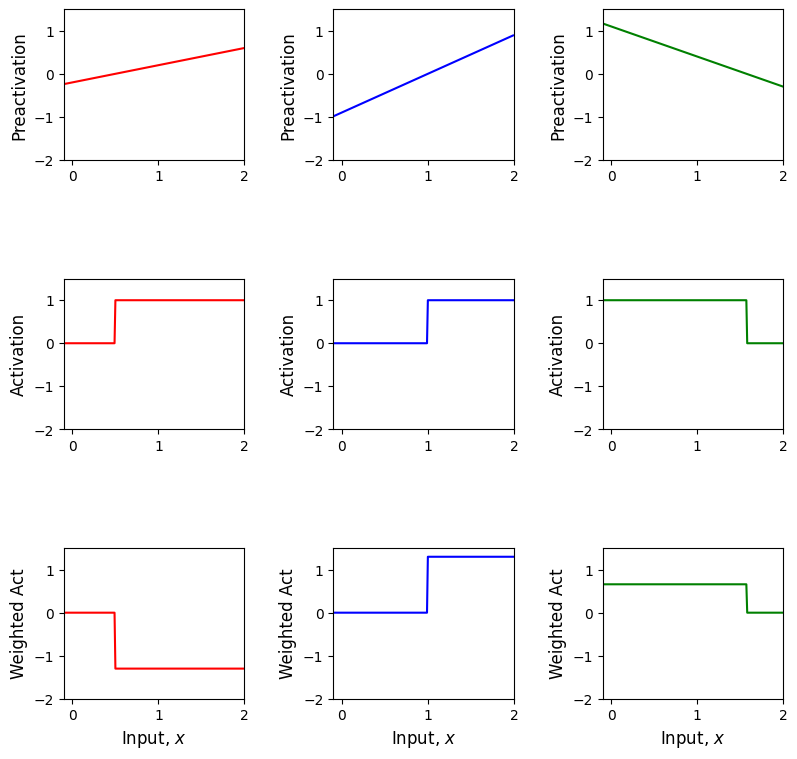

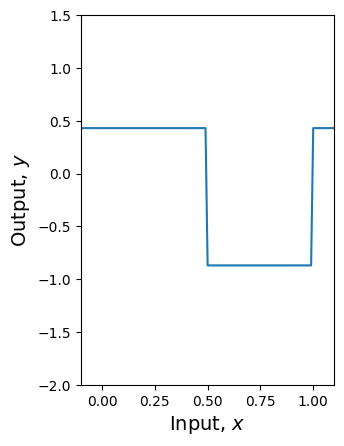

In [32]:
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66
# Define a range of input values
x = np.arange(-1,2,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, heaviside, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

This can approximate any function, but the output is discontinuous, and there are also reasons not to use it that we will discover when we learn more about model fitting.

[-1.0000000e+00 -9.9000000e-01 -9.8000000e-01 -9.7000000e-01
 -9.6000000e-01 -9.5000000e-01 -9.4000000e-01 -9.3000000e-01
 -9.2000000e-01 -9.1000000e-01 -9.0000000e-01 -8.9000000e-01
 -8.8000000e-01 -8.7000000e-01 -8.6000000e-01 -8.5000000e-01
 -8.4000000e-01 -8.3000000e-01 -8.2000000e-01 -8.1000000e-01
 -8.0000000e-01 -7.9000000e-01 -7.8000000e-01 -7.7000000e-01
 -7.6000000e-01 -7.5000000e-01 -7.4000000e-01 -7.3000000e-01
 -7.2000000e-01 -7.1000000e-01 -7.0000000e-01 -6.9000000e-01
 -6.8000000e-01 -6.7000000e-01 -6.6000000e-01 -6.5000000e-01
 -6.4000000e-01 -6.3000000e-01 -6.2000000e-01 -6.1000000e-01
 -6.0000000e-01 -5.9000000e-01 -5.8000000e-01 -5.7000000e-01
 -5.6000000e-01 -5.5000000e-01 -5.4000000e-01 -5.3000000e-01
 -5.2000000e-01 -5.1000000e-01 -5.0000000e-01 -4.9000000e-01
 -4.8000000e-01 -4.7000000e-01 -4.6000000e-01 -4.5000000e-01
 -4.4000000e-01 -4.3000000e-01 -4.2000000e-01 -4.1000000e-01
 -4.0000000e-01 -3.9000000e-01 -3.8000000e-01 -3.7000000e-01
 -3.6000000e-01 -3.50000

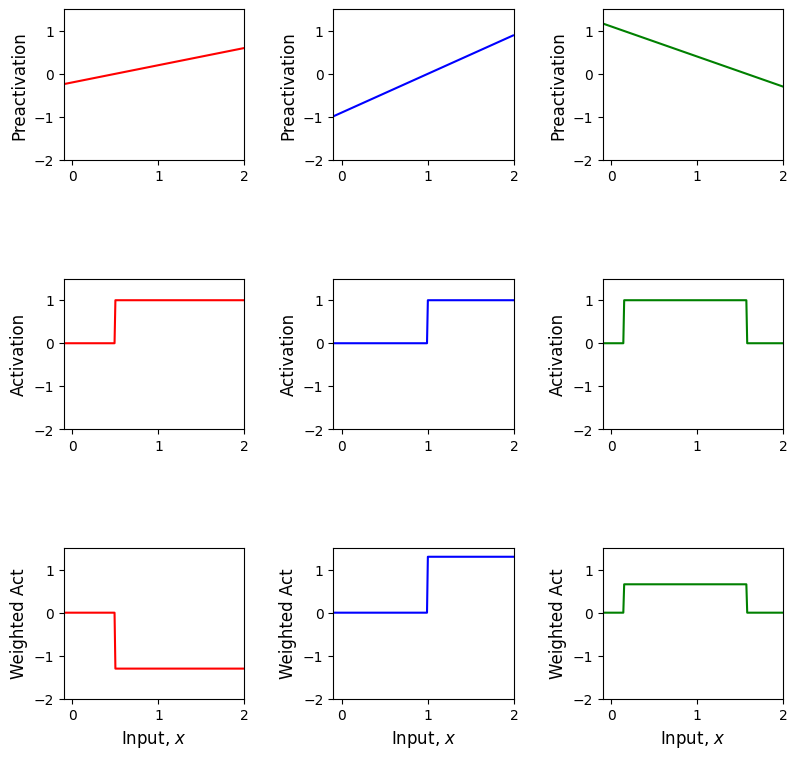

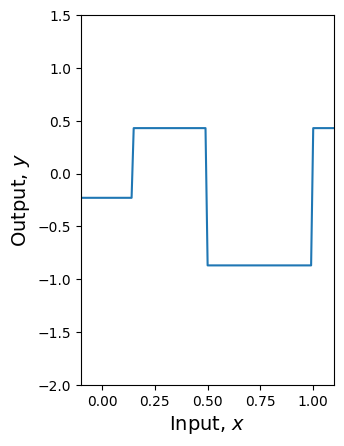

In [41]:
theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66
# Define a range of input values
x = np.arange(-1,2,0.01)
print(x)
print()
print()

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, rectangular, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

In [31]:
import numpy as np
preactivation = np.array([-1, 0.2, 0.5, 1, 1.5])
rectangular(preactivation)

array([0, 1, 1, 1, 0])

# Linear activation functions

Neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was:

\begin{equation}
\text{lin}[z] = a + bz
\end{equation}

In [ ]:
# Define the linear activation function
def lin(preactivation):
  a =0
  b =1
  # Compute linear function
  activation = a+b * preactivation
  # Return
  return activation

In [ ]:
def tanh(preactivation):

  # Compute linear function
  activation = np.tanh(preactivation)
  # Return
  return activation

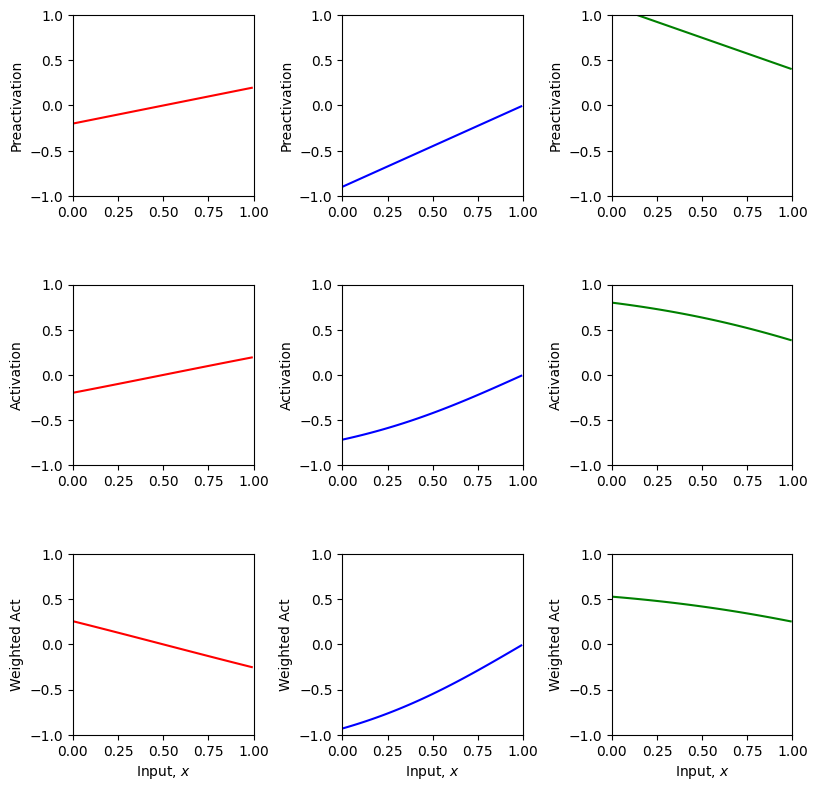

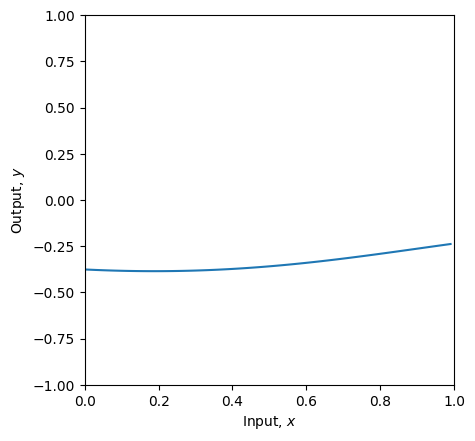

In [ ]:
# TODO
# 1. The linear activation function above just returns the input: (0+1*z) = z
# Before running the code Make a prediction about what the ten panels of the drawing will look like
# Now run the code below to see if you were right. What family of functions can this represent?

# 2. What happens if you change the parameters (a,b) to different values?
# Try a=0.5, b=-0.4 Don't forget to run the cell again to update the function

theta_10 =  -0.2 ; theta_11 = 0.4
theta_20 = -0.9  ; theta_21 = 0.9
theta_30 = 1.1  ; theta_31 = -0.7
phi_0 = -0.23; phi_1 = -1.3; phi_2 = 1.3; phi_3 = 0.66
# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(x, tanh, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)